In [1]:
from PIL import Image
from resizeimage import resizeimage
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from model_restore import restore_model
from utils import *

C:\Users\Hiep Nguyen\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
cascadePath = ".\\data\\haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascadePath);

In [3]:
recognizer = cv2.face.LBPHFaceRecognizer_create()

In [4]:
def reshape_input_image(path):
    img = Image.open(path).convert('L')
    if np.array(img,'uint8').shape[0]!=243 and np.array(img,'uint8').shape[1]!=320:
        img = resizeimage.resize_contain(img, [320, 243])
    image = np.array(img, 'uint8')
    if image.ndim==3: #check if rgb
        images_rgb=[]
        faces_rgb = faceCascade.detectMultiScale(image)    
        for (height, weight, w, h) in faces_rgb:
            images_rgb.append(image[weight: weight + 151, height: height + 151])
        return (np.dot(images_rgb[0][...,:3], [0.299, 0.587, 0.114]))/255
    elif image.ndim==2: #check if greyscale
        images_grey=[]
        faces_grey = faceCascade.detectMultiScale(image)
        for (height, weight, w, h) in faces_grey:
            images_grey.append(image[weight: weight + 151, height: height + 151])
        return images_grey[0]

In [5]:
parameters=restore_model()

INFO:tensorflow:Restoring parameters from ./saved_model/CNN_model.ckpt


In [6]:
def test_specific_image(path):
    img= reshape_input_image(path)
    plt.imshow(img)
    img=img.reshape(1,151,151,1)
    pre=predict(img,parameters)
    lookup_table={0:'sad',
                 1:'neutral',
                 2:'happy',
                 3:'surprised'}
    return lookup_table[np.asscalar(pre)]

In [7]:
#######################################
#CUSTOMIZED TEST CASES START FROM HERE#
#######################################

'neutral'

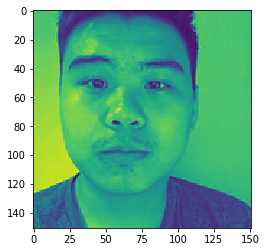

In [8]:
test_specific_image('C:/Users/Hiep Nguyen/Desktop/Emotion_Detector/data/custom/hiep.normal')

'sad'

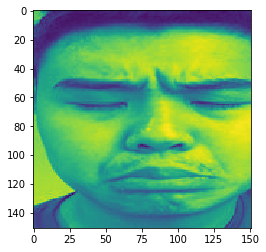

In [9]:
test_specific_image('C:/Users/Hiep Nguyen/Desktop/Emotion_Detector/data/custom/hiep.sad')

'happy'

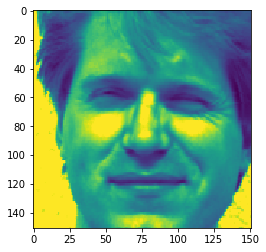

In [10]:
test_specific_image('C:/Users/Hiep Nguyen/Desktop/Emotion_Detector/data/custom/subject01.wink')

'sad'

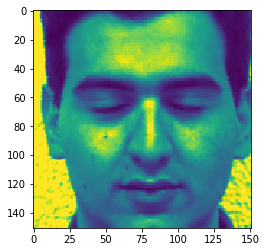

In [11]:
test_specific_image('C:/Users/Hiep Nguyen/Desktop/Emotion_Detector/data/custom/subject15.sleepy')

'happy'

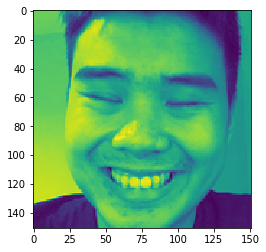

In [12]:
test_specific_image('C:/Users/Hiep Nguyen/Desktop/Emotion_Detector/data/custom/hiep_happy.jpg')

'happy'

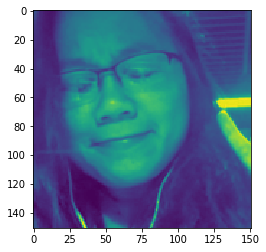

In [13]:
test_specific_image('C:/Users/Hiep Nguyen/Desktop/Emotion_Detector/data/custom/nhi_happy.jpg')